# COST COMPLEXITY PRUNING OF DECISION TREES

In 0.22 version, Scikit-learn introduced this parameter called ccp_alpha (It’s short for Cost Complexity Pruning- Alpha) to Decision Trees which can be used to perform the same.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

1.0 0.6


In [12]:
path = dtree.cost_complexity_pruning_path(x_train, y_train)
alphas = path["ccp_alphas"]

alphas

array([0.        , 0.01530612, 0.01680672, 0.02295918, 0.03214286,
       0.05090732, 0.064685  ])

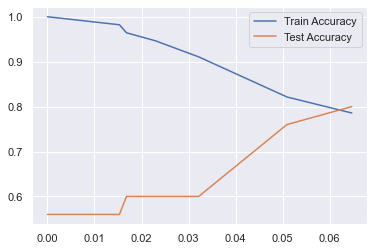

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [13]:
accuracy_train, accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit (x_train,y_train)
    y_train_pred=tree.predict (x_train)
    y_test_pred=tree.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

sns.set()

sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas, label="Test Accuracy")
# plt.xticks (ticks=np.arange (0.00,0.25,0.01))
plt.show()
plt.figure(figsize=(14,7))

In [14]:
dtree_ccp = DecisionTreeClassifier(ccp_alpha= 0.12, random_state=143)
dtree_ccp.fit(x_train,y_train)
y_train_pred_ccp = dtree_ccp.predict(x_train)
y_test_pred_ccp = dtree_ccp.predict(x_test)

print(accuracy_score(y_train, y_train_pred_ccp), accuracy_score(y_test, y_test_pred_ccp))

0.7857142857142857 0.8
